<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [5]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [8]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [10]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [13]:
movies['duration'].median()

117.0

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [26]:
movies.sort_values(by='duration',inplace=True)
shortest = movies['title'].iloc[0]
longest = movies['title'].iloc[-1]
print(shortest, longest)

Freaks Hamlet


#### Create a histogram of duration, choosing an "appropriate" number of bins.

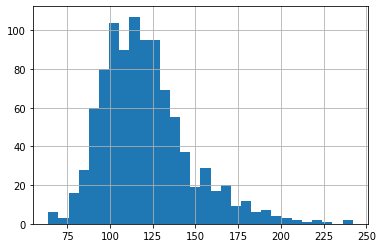

In [38]:
movies['duration'].hist(bins=30)

#### Use a box plot to display that same data.

{'whiskers': [<matplotlib.lines.Line2D at 0x9366b88>,
 'caps': [<matplotlib.lines.Line2D at 0x9366d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x93663c8>],
 'medians': [<matplotlib.lines.Line2D at 0x936ad08>],
 'fliers': [<matplotlib.lines.Line2D at 0x936ad88>],
 'means': []}

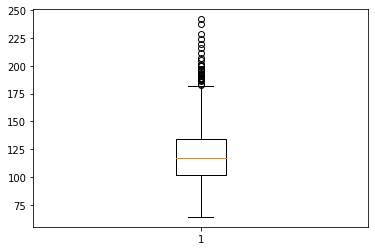

In [16]:
plt.boxplot(movies['duration'])

## Intermediate level

#### Count how many movies have each of the content ratings.

In [27]:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

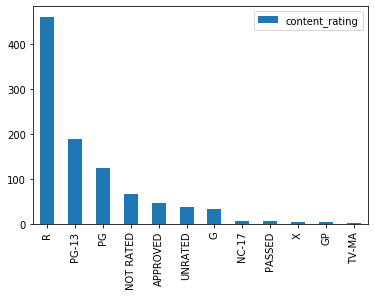

In [33]:
pd.value_counts(movies['content_rating']).plot.bar(legend = True)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [54]:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [60]:
movies = movies.replace({'content_rating':{'NOT RATED': 'UNRATED', 'APPROVED' : 'UNRATED', 'PASSED' : 'UNRATED', 'GP' : 'UNRATED'}})
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [61]:
movies = movies.replace({'content_rating':{'X': 'NC-17', 'TV-MA' : 'NC-17'}})
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [62]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [77]:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


In [83]:
movies['content_rating'].fillna(value='UNRATED', inplace= True)
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [92]:
hrs2 = movies.loc[movies['duration'] >= 120]
hrs2

,star_rating,title,content_rating,genre,duration,actors_list
554,7.8,The Social Network,PG-13,Biography,120,"[u'Jesse Eisenberg', u'Andrew Garfield', u'Jus..."
506,7.8,Blue Velvet,R,Crime,120,"[u'Isabella Rossellini', u'Kyle MacLachlan', u..."
246,8.1,Stalag 17,UNRATED,Comedy,120,"[u'William Holden', u'Don Taylor', u'Otto Prem..."
797,7.6,Collateral,R,Crime,120,"[u'Tom Cruise', u'Jamie Foxx', u'Jada Pinkett ..."
77,8.4,Oldeuboi,R,Drama,120,"[u'Min-sik Choi', u'Ji-tae Yu', u'Hye-jeong Ka..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,UNRATED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


In [93]:
hrs2['star_rating'].mean()

7.9488986784140945

#### Use a visualization to detect whether there is a relationship between duration and star rating.

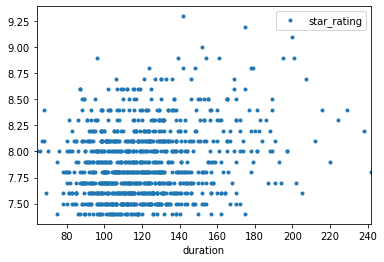

In [79]:
movies.plot(x='duration', y='star_rating', style='.')


#### Calculate the average duration for each genre.

In [69]:
movies.groupby('content_rating').duration.mean()

content_rating
APPROVED     113.914894
G            112.343750
GP           135.666667
NC-17        119.857143
NOT RATED    122.661538
PASSED       104.285714
PG           115.300813
PG-13        127.195767
R            122.163043
TV-MA        131.000000
UNRATED      109.789474
X            106.250000
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

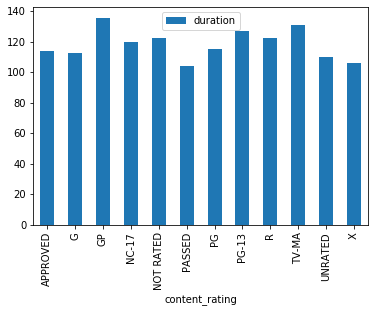

In [70]:
mov_cr = movies.groupby('content_rating').duration.mean()
mov_cr.plot(kind='bar', legend=True)

#### Determine the top rated movie (by star rating) for each genre.

In [88]:
mov_top = movies.sort_values('star_rating',ascending = False).groupby('genre').head(1)
mov_top = mov_top[['genre', 'title']]
mov_top

,genre,title
0,Crime,The Shawshank Redemption
3,Action,The Dark Knight
9,Drama,Fight Club
8,Biography,Schindler's List
7,Adventure,The Lord of the Rings: The Return of the King
6,Western,"The Good, the Bad and the Ugly"
25,Comedy,Life Is Beautiful
30,Animation,Spirited Away
38,Mystery,Rear Window
39,Horror,Psycho


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [102]:
movies['title'].duplicated().sum()

4

In [95]:
movies.duplicated().sum()

0

In [103]:
movies.loc[movies['title'].duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [137]:
movies.groupby('genre').title.count() 

genre
Action       136
Adventure     75
Animation     62
Biography     77
Comedy       156
Crime        124
Drama        278
Family         2
Fantasy        1
Film-Noir      3
History        1
Horror        29
Mystery       16
Sci-Fi         5
Thriller       5
Western        9
Name: title, dtype: int64

In [142]:
for i in movies.groupby('genre'):


SyntaxError: 'return' outside function (<ipython-input-142-e022d26617af>, line 2)

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!